In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
df["PoolQC"] = df["PoolQC"].fillna(0)
df["ExterQual"] = df["ExterQual"].fillna(0)
df["ExterCond"] = df["ExterCond"].fillna(0)
df["BsmtQual"] = df["BsmtQual"].fillna(0)
df["BsmtCond"] = df["BsmtCond"].fillna(0)
df["HeatingQC"] = df["HeatingQC"].fillna(0)
df["KitchenQual"] = df["KitchenQual"].fillna(0)
df["FireplaceQu"] = df["FireplaceQu"].fillna(0)
df["GarageQual"] = df["GarageQual"].fillna(0)
df["GarageCond"] = df["GarageCond"].fillna(0)

In [6]:
df = df.replace("Ex", 5)
df = df.replace("Gd", 4)
df = df.replace("TA", 3)
df = df.replace("Fa", 2)
df = df.replace("Po", 1)

In [7]:
df.dtypes.value_counts()

int64      45
object     33
float64     3
dtype: int64

In [8]:
df["CentralAir"] = df["CentralAir"].replace("Y", 1)
df["CentralAir"] = df["CentralAir"].replace("N", 0)
df["CentralAir"].value_counts() #YES or No variable

1    1365
0      95
Name: CentralAir, dtype: int64

In [9]:
df.dtypes.value_counts()

int64      46
object     32
float64     3
dtype: int64

In [10]:
#df["PoolQC"].value_counts()
#df["ExterQual"].value_counts()
#df["ExterCond"].value_counts()
#df["BsmtQual"].value_counts()
#df["BsmtCond"].value_counts()
#df["HeatingQC"].value_counts()
#df["CentralAir"].value_counts() #YES or No variable
#df["KitchenQual"].value_counts()
#df["FireplaceQu"].value_counts()
#df["GarageQual"].value_counts()
#df["GarageCond"].value_counts()

In [11]:
#please, KEEP IT as they are useful
#print(df.groupby('Street')['SalePrice'].mean())
#df["Street"].unique()
#plt.bar(['Grvl', 'Pave'], df.groupby('Street')['SalePrice'].mean())
#plt.scatter(df['PoolQC'], df['SalePrice'])

#df[df["ExterCond"] != 1]
#np.corrcoef(df["ExterQual"], df["ExterCond"])
#plt.scatter(df["ExterQual"], df["ExterCond"])

In [12]:
homedata_onehot = pd.get_dummies(df, columns=['Foundation', 'GarageFinish', 'LandSlope', 'LotConfig', 'GarageQual',
 'GarageCond', 'LandContour', 'Utilities', 'GarageType', 'LotShape', 'Alley',
 'Street', 'PoolQC', 'Fence', 'MiscFeature', 'MSZoning', 'SaleType',
 'PavedDrive', 'FireplaceQu', 'Condition1', 'Functional', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'ExterQual', 'BsmtFinType2',
 'MasVnrType', 'Exterior2nd', 'Heating', 'Neighborhood', 'SaleCondition',
 'Electrical', 'Exterior1st', 'RoofMatl', 'RoofStyle', 'HouseStyle', 'BldgType',
 'Condition2', 'KitchenQual', 'ExterCond', 'CentralAir', 'HeatingQC'])

In [13]:
homedata_onehot.dtypes.value_counts()

uint8      258
int64       35
float64      3
dtype: int64

In [14]:
homedata_onehot.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ExterCond_3,ExterCond_4,ExterCond_5,CentralAir_0,CentralAir_1,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,HeatingQC_5
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1,0,0,0,1,0,0,0,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,0,0,0,1,0,0,0,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,0,0,0,1,0,0,0,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,0,0,0,1,0,0,0,1,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,0,0,0,1,0,0,0,0,1


In [15]:
NA = pd.DataFrame(columns=['Column',
                  'perc_NA'])
for column in homedata_onehot.columns:
    NA = NA.append({'Column' : column, 'perc_NA' : sum(homedata_onehot[column].isna())/len(homedata_onehot)}, ignore_index=True)

In [16]:
NA.sort_values('perc_NA', ascending=False)

,Column,perc_NA
2,LotFrontage,0.177397
25,GarageYrBlt,0.055479
8,MasVnrArea,0.005479
0,Id,0.000000
196,Neighborhood_BrDale,0.000000
202,Neighborhood_Gilbert,0.000000
201,Neighborhood_Edwards,0.000000
200,Neighborhood_Crawfor,0.000000
199,Neighborhood_CollgCr,0.000000
198,Neighborhood_ClearCr,0.000000


In [17]:
#homedata_onehot['LotFrontage'].value_counts()
print(sum(homedata_onehot['LotFrontage'].isna()))
homedata_onehot['LotFrontage'].mean()

259


70.04995836802665

In [18]:
homedata_onehot['LotFrontage'] = homedata_onehot['LotFrontage'].fillna(70.04995836802665)
print(sum(homedata_onehot['LotFrontage'].isna()))
homedata_onehot['LotFrontage'].mean()

0


70.04995836802642

In [19]:
#homedata_onehot['GarageYrBlt'].value_counts()
print(sum(homedata_onehot['GarageYrBlt'].isna()))
#homedata_onehot['GarageYrBlt'].mean()

81


In [20]:
same_count=0
diff_count=0
total_diff = 0
for i, x in zip(homedata_onehot['YearBuilt'],homedata_onehot['GarageYrBlt']):
    if np.isnan(x):
        continue
    else:
        if i == x:
            same_count+=1
        else:
            diff_count+=1
            total_diff= total_diff+(x-i)
        
print('same count:', same_count)
print('diff_count:', diff_count)
print('avg diff:', total_diff/diff_count)
print(same_count/(same_count+diff_count))
print(1-(same_count/(same_count+diff_count)))
print(81*0.79)
print(81*0.21)


same count: 1089
diff_count: 290
avg diff: 26.379310344827587
0.7897026831036983
0.2102973168963017
63.99
17.009999999999998


In [23]:
homedata_onehot['GarageYrBlt'] = homedata_onehot['YearBuilt']

In [29]:
print(sum(homedata_onehot['MasVnrArea'].isna()))
homedata_onehot['MasVnrArea'] = homedata_onehot['MasVnrArea'].fillna(0)

8


In [31]:
NA = pd.DataFrame(columns=['Column',
                  'perc_NA'])
for column in homedata_onehot.columns:
    NA = NA.append({'Column' : column, 'perc_NA' : sum(homedata_onehot[column].isna())/len(homedata_onehot)}, ignore_index=True)
NA.sort_values('perc_NA', ascending=False)

,Column,perc_NA
0,Id,0.0
203,Neighborhood_IDOTRR,0.0
201,Neighborhood_Edwards,0.0
200,Neighborhood_Crawfor,0.0
199,Neighborhood_CollgCr,0.0
198,Neighborhood_ClearCr,0.0
197,Neighborhood_BrkSide,0.0
196,Neighborhood_BrDale,0.0
195,Neighborhood_Blueste,0.0
194,Neighborhood_Blmngtn,0.0


In [33]:
homedata_onehot['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(homedata_onehot.drop(['SalePrice', 'Id'], axis=1), homedata_onehot['SalePrice'], train_size=0.8, random_state=0)
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

1168
1168
292
292


In [107]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

linear = linear_model.LinearRegression().fit(X_train, y_train)
ridge = linear_model.Ridge(alpha=1.0,normalize=True).fit(X_train, y_train)
lasso = linear_model.Lasso(alpha=1.0).fit(X_train, y_train)

linear_pred = linear.predict(X_val)
ridge_pred = ridge.predict(X_val)
lasso_pred = lasso.predict(X_val)

MAE_linear_pred = mean_absolute_error(y_val, linear_pred)
print('MAE linear pred:',MAE_linear_pred)

MAE_ridge_pred = mean_absolute_error(y_val, ridge_pred)
print('MAE ridge pred:',MAE_ridge_pred)

MAE_lasso_pred = mean_absolute_error(y_val, lasso_pred)
print('MAE lasso pred:',MAE_lasso_pred)

MAE linear pred: 23116.36807185119
MAE ridge pred: 20449.063553978933
MAE lasso pred: 22177.412062412957


C:\Users\larsb\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194571854777.12952, tolerance: 719132949.9230078
  positive)


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=250, max_depth=20, random_state=0).fit(X_train, y_train)

y_pred = rf.predict(X_val)

MSE_RF_pred = mean_squared_error(y_val, y_pred)
MAE_RF_pred = mean_absolute_error(y_val, y_pred)
print('RMSE RF pred:', MSE_RF_pred**(1/2.0))
print('MAE RF pred:', MAE_RF_pred)

RMSE RF pred: 40213.95502334809
MAE RF pred: 24633.921232876713


In [109]:
from sklearn.svm import SVC

svm_1 = SVC(kernel='poly', degree=1, gamma='auto', random_state=0).fit(X_train, y_train)

svm1_pred = svm_1.predict(X_val)

MSE_svm1_pred = mean_squared_error(y_val, svm1_pred)
MAE_svm1_pred = mean_absolute_error(y_val, svm1_pred)
print('RMSE RF pred:', MSE_svm1_pred**(1/2.0))
print('MAE RF pred:', MAE_svm1_pred)

RMSE RF pred: 50085.26700705316
MAE RF pred: 31427.16095890411


In [110]:
import xgboost as xgb
from collections import OrderedDict

xgb1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 1.0, n_estimators = 250)


xgb1.fit(X_train, y_train)
xgb_pred = xgb1.predict(X_val)
MAE_xgb_pred = mean_absolute_error(y_val, xgb_pred)
print('MAE xgb pred:', MAE_xgb_pred)

print(xgb1.feature_importances_)

C:\Users\larsb\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


MAE xgb pred: 15957.756902825342
[5.14215382e-04 1.09704328e-03 1.68592157e-03 6.29984438e-02
 1.14103791e-03 1.90181204e-03 2.91940710e-03 8.44906084e-04
 4.01427224e-03 3.93169234e-04 5.32055565e-04 7.34282890e-03
 1.15599288e-02 3.24987294e-03 7.58410955e-04 1.69803165e-02
 1.60908652e-03 3.61909741e-04 1.06492206e-01 2.86332401e-03
 6.49060996e-04 1.49892094e-02 3.72439227e-03 2.52233949e-02
 1.10933627e-03 5.84661625e-02 1.74374096e-02 7.65964563e-04
 5.28003613e-04 1.49406813e-04 9.26794310e-05 5.07139950e-04
 7.61248928e-04 5.09609585e-04 6.95808267e-04 2.39874425e-04
 1.46535016e-03 7.27628067e-05 4.54960158e-04 4.13790904e-03
 2.37843153e-04 3.05522826e-06 6.50906994e-04 1.51902321e-04
 5.51978068e-04 2.19288212e-03 2.87758248e-05 4.20043325e-05
 2.25865282e-04 2.99465348e-04 1.70999716e-04 0.00000000e+00
 8.03261282e-05 2.85558286e-04 2.63154390e-03 4.88493766e-04
 2.42988556e-03 5.81078290e-04 0.00000000e+00 4.26086318e-03
 4.87286570e-07 6.21240833e-05 1.02579431e-03 5.7412

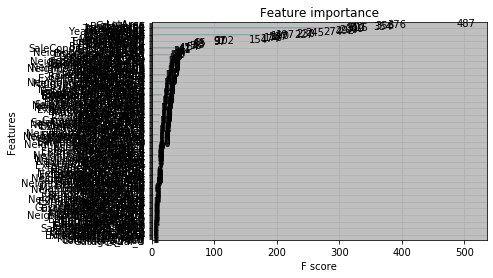

In [111]:
xgb.plot_importance(xgb1)